In [1]:
import matplotlib.pyplot as plt
import numpy as np

import mltools.models as models
import mltools.lossfuncs as lossfuncs
import mltools.funcs as funcs
import mltools.aggfuncs as aggfuncs
import mltools.risks as risks
import mltools.gda as gda

### Простой пример восстановления линейной регрессии

In [2]:
# y = 2x+1
linmod = models.LinearModel(1, np.array([1,2], 'd'))

In [3]:
X = np.linspace(-1.0, 1.0, 5)
Xs = X.reshape(-1, 1)
Y = linmod.evaluate_all(Xs)
Y += np.random.random(len(Y)) - 0.5
linmod_orig = linmod

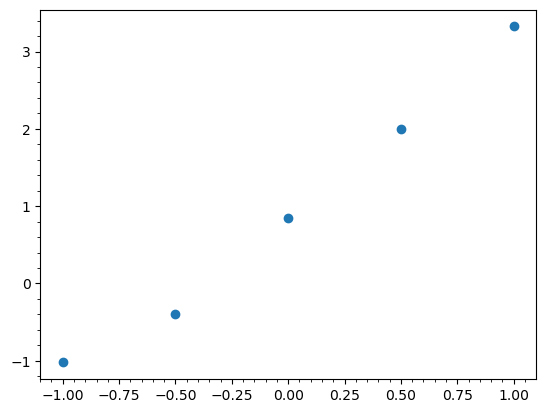

In [4]:
plt.scatter(X, Y)
plt.minorticks_on()
plt.show()

159 [0.94962517 2.21605919]


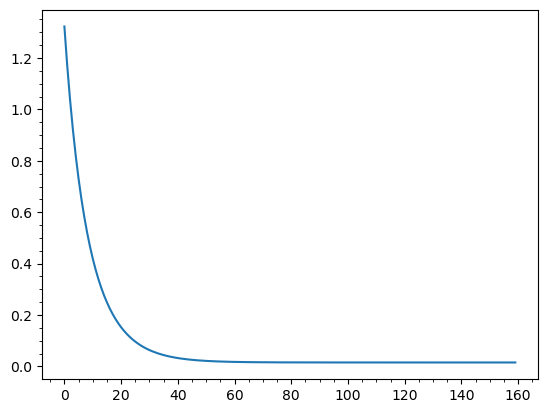

In [5]:
linmod = models.LinearModel(1)
linmod.param = np.random.random(2)

loss_func = lossfuncs.ErrorLoss(funcs.Square())
risk = risks.Risk(linmod, loss_func)

gd = gda.GradientDescent(risk)
gd.fit(Xs, Y)
print(gd.K, linmod.param)

plt.plot(gd.rvals)
plt.minorticks_on()
plt.show()

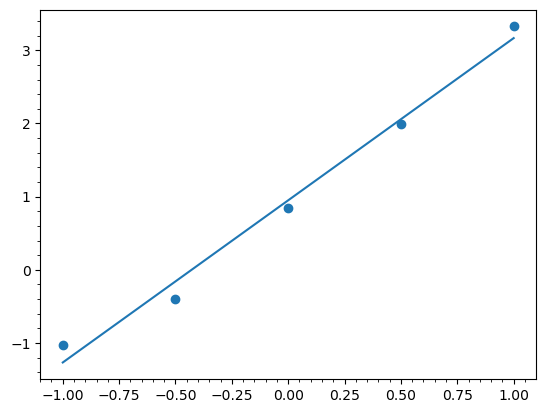

In [6]:
plt.scatter(X, Y)
plt.plot(X, linmod.evaluate_all(Xs))
plt.minorticks_on()
plt.show()

### Простой пример линейного разделения классов

In [7]:
X0 = np.random.random((30,2))
X0[:,0] += 1
X0[:,1] += 1 
Y0 = np.ones(30, 'd')
X1 = np.random.random((30,2))
Y1 = -np.ones(30, 'd')
X = np.vstack((X0,X1))
Y = np.hstack((Y0,Y1))

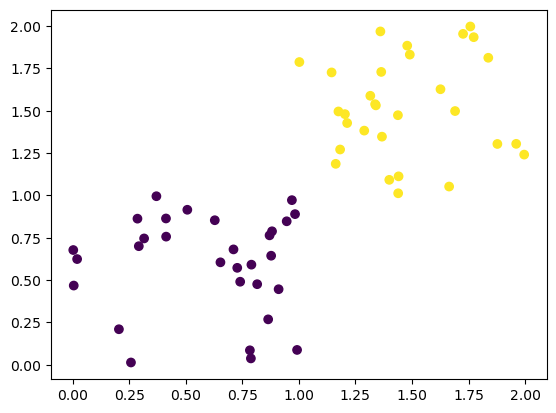

In [8]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

1000 [-4.63991285  2.36721114  2.06752561]


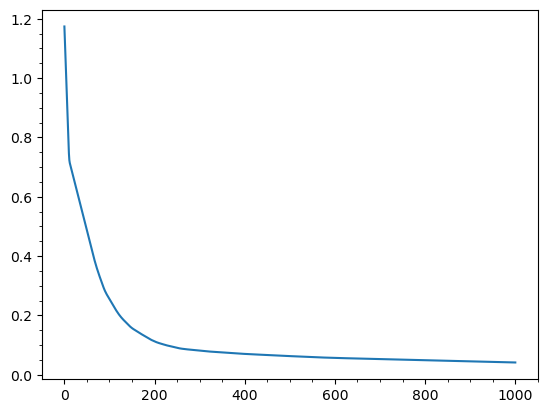

In [9]:
line = models.LinearModel(2)
line.param = np.random.random(3)

loss_hinge = lossfuncs.MarginLoss(funcs.Hinge())
risk = risks.Risk(line, loss_hinge)

gd = gda.GradientDescent(risk)
gd.fit(X, Y)
print(gd.K, line.param)

plt.plot(gd.rvals)
plt.minorticks_on()
plt.show()

In [10]:
Yp = np.sign(line.evaluate_all(X))

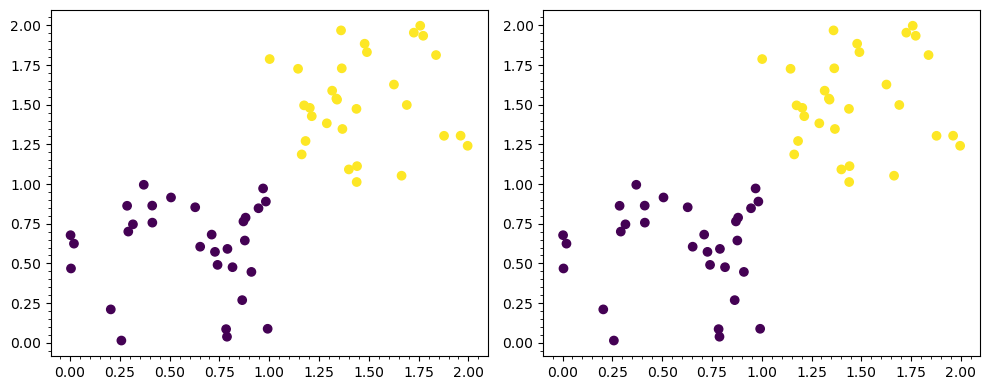

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(X[:,0], X[:,1], c=Y)
plt.minorticks_on()
plt.subplot(1,2,2)
plt.scatter(X[:,0], X[:,1], c=Yp)
plt.minorticks_on()
plt.tight_layout()
plt.show()

In [12]:
xrange = np.linspace(0,2,100)
yrange = np.linspace(0,2,100)
XX, YY = np.meshgrid(xrange, yrange)
XY = np.c_[XX.ravel(), YY.ravel()]
Z = line.evaluate_all(XY)
ZZ = Z.reshape(XX.shape)

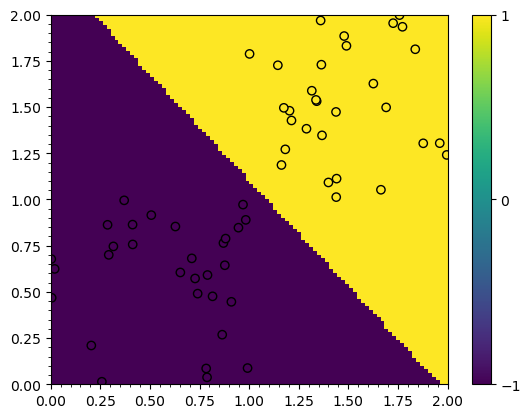

In [13]:
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k')
cs = plt.imshow(np.sign(ZZ), origin='lower', 
                extent=(0.,2.,0.,2.), aspect='auto')
plt.colorbar(cs, ticks=(-1,0,1))
plt.minorticks_on()
plt.show()

### Пример обучение однослойной нейронной сети для разделения 2-х классов

1 [0.48445255 0.87867752 0.54647938 0.30557452 0.26807775 0.99272357
 0.90427185 0.26493278 0.80918556 0.16670196 0.48854355 0.99211638
 0.36384411]
[1.0, 1.0]


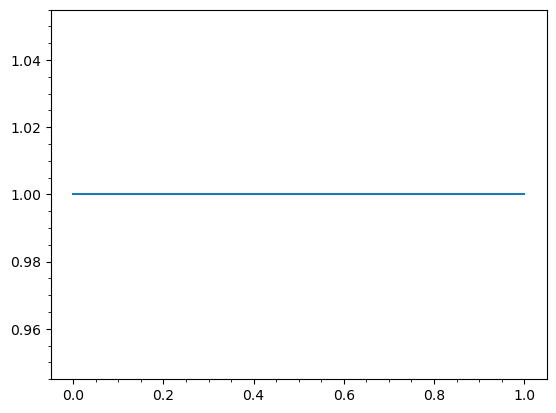

In [14]:
nn1 = models.SimpleNN(funcs.Sigmoidal(1), 2, 3)
nn1.param = np.random.random(nn1.n_param)

loss_hinge = lossfuncs.MarginLoss(funcs.Hinge())
risk = risks.Risk(nn1, loss_hinge)

gd = gda.GradientDescent(risk, h=0.1)
gd.fit(X, Y)
print(gd.K, nn1.param)

print(gd.rvals)
plt.plot(gd.rvals)
plt.minorticks_on()
plt.show()

In [15]:
Yp = np.sign(nn1.evaluate_all(X))

In [16]:
xrange = np.linspace(0,2,100)
yrange = np.linspace(0,2,100)
XX, YY = np.meshgrid(xrange, yrange)
XY = np.c_[XX.ravel(), YY.ravel()]
Z = nn1.evaluate_all(XY)
ZZ = Z.reshape(XX.shape)

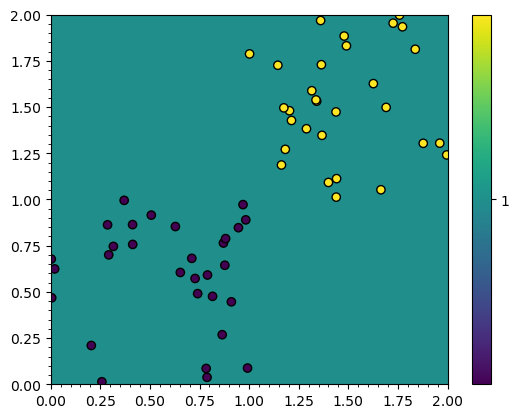

In [17]:
plt.scatter(X[:,0], X[:,1], c=Y, edgecolors='k')
cs = plt.imshow(np.sign(ZZ), origin='lower', 
                extent=(0.,2.,0.,2.), aspect='auto')
plt.colorbar(cs, ticks=(-1,0,1))
plt.minorticks_on()
plt.show()

### Пример восстановления функции ИСКЛЮЧАЮЩЕГО ИЛИ

In [18]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]], 'd')

Y = np.array([-1, 1, 1, -1], 'd')

In [19]:
nn_xor = pyinv.NN1(pyinv.Sigmoidal(), 2, 3)
nn_xor.init_param()

loss_hinge = pyinv.MarginLoss(pyinv.Hinge())
am = pyinv.ArithMean()
risk = pyinv.Risk(nn_xor, loss_hinge, am)

gd = pyinv.GradientDescent(risk,h=0.2,n_iter=1000)
gd.fit(X, Y)
print(gd.K, nn_xor.param)

plt.plot(gd.rvals)
plt.minorticks_on()
plt.show()

NameError: name 'pyinv' is not defined

In [ ]:
Yp = np.sign(nn_xor.evaluate_all(X))
print(Yp)

In [ ]:
body = pyinv.NN()
models = []
for j in range(3):
    mod = pyinv.SigmaNeuronModel(pyinv.Sigmoidal(), 2)
    models.append(mod)
layer = pyinv.FuncLayer(models)
body.add(layer)

head = pyinv.LinearModel(3)

nn = pyinv.ModelNN(head, body)

nn.init_param()

In [ ]:
loss_hinge = pyinv.MarginLoss(pyinv.Hinge())
am = pyinv.ArithMean()
risk = pyinv.Risk(nn, loss_hinge)

gd = pyinv.GradientDescent(risk,h=0.1,n_iter=5000)
gd.fit(X, Y)
print(gd.K, nn_xor.param)

plt.plot(gd.rvals)
plt.minorticks_on()
plt.show()

In [ ]:
Yp = np.sign(nn.evaluate_all(X))
print(Yp)